<a href="https://colab.research.google.com/github/2403a52026-lgtm/ML_LAB_Assignment/blob/main/ML_Labassignment_08_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("/content/CO2 Emissions_Canada.csv")

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
X = df[['Engine Size(L)',
        'Cylinders',
        'Fuel Consumption Comb (L/100 km)']]

y = df['CO2 Emissions(g/km)']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)

Linear Regression Results
MSE: 421.92233190519977
R2 Score: 0.8773348735033225


In [12]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Results")
print("MSE:", lasso_mse)
print("R2 Score:", lasso_r2)

Lasso Regression Results
MSE: 421.9906734651132
R2 Score: 0.8773150046187961


In [14]:
ridge = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}

grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

best_ridge = grid.best_estimator_

print("Best Alpha:", grid.best_params_['alpha'])

Best Alpha: 10


In [15]:
y_pred_ridge = best_ridge.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results")
print("MSE:", ridge_mse)
print("R2 Score:", ridge_r2)

Ridge Regression Results
MSE: 421.94896543141095
R2 Score: 0.8773271303605337


In [16]:
print("----- Model Comparison -----")

print("Linear Regression R2:", lr_r2)
print("Lasso Regression R2:", lasso_r2)
print("Ridge Regression R2:", ridge_r2)

----- Model Comparison -----
Linear Regression R2: 0.8773348735033225
Lasso Regression R2: 0.8773150046187961
Ridge Regression R2: 0.8773271303605337


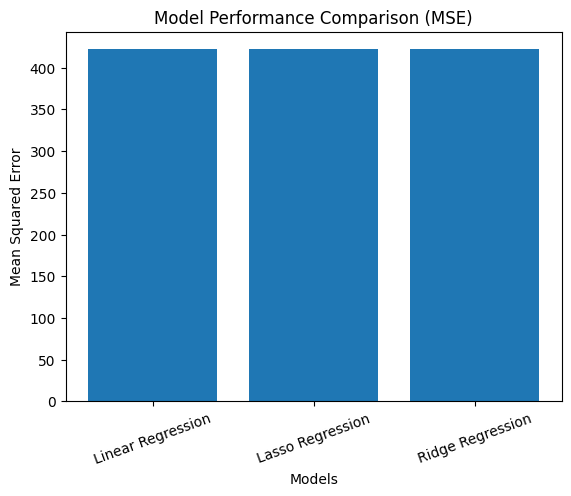

In [20]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
mse_scores = [lr_mse, lasso_mse, ridge_mse]

plt.figure()
plt.bar(models, mse_scores)

plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Model Performance Comparison (MSE)")

plt.xticks(rotation=20)
plt.show()